In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f = "../data/ClimaLab_2023-10-27_2025-04-30.parquet"
tmx = pd.read_parquet(f)
tmx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79036 entries, 2023-10-27 16:40:00 to 2025-04-30 00:00:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dhi             39186 non-null  float64
 1   dni             39043 non-null  float64
 2   ghi             39104 non-null  float64
 3   p_atm           79036 non-null  float64
 4   rain_acc        79036 non-null  float64
 5   rh              79036 non-null  float64
 6   solar_altitude  79036 non-null  float64
 7   tdb             79036 non-null  float64
 8   uv              79036 non-null  float64
 9   wd              79036 non-null  float64
 10  ws              79036 non-null  float64
dtypes: float64(11)
memory usage: 7.2 MB


In [3]:
tmx.index.month_name()

Index(['October', 'October', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October',
       ...
       'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April'],
      dtype='object', name='date', length=79036)

In [4]:
tmx2024 = tmx[tmx.index.year == 2024].copy()
tmx2024_horario = tmx2024.tdb.resample("h").max().copy()
tdb_heatmap = tmx2024_horario.groupby(
            by=[
                tmx2024_horario.index.month,
                tmx2024_horario.index.hour]
            ).mean().unstack().T
tdb_heatmap

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
0,19.855806,22.210000,23.666774,26.029000,27.401290,24.646333,21.291935,21.248710,20.750667,20.318387,19.956000,18.789032
1,19.075806,21.249286,22.894194,25.174333,26.405806,24.049333,20.897419,21.000645,20.473000,19.732903,19.239667,18.223226
2,18.565806,20.273214,22.337742,24.334333,25.687742,23.453000,20.463226,20.622581,20.212333,19.278387,18.810000,17.567742
3,18.227742,19.526429,21.666129,23.567667,24.965161,22.915000,20.036129,20.400000,20.109000,18.740645,18.176000,16.937097
4,17.727097,18.635714,20.926774,22.976333,24.266452,22.467000,19.728710,20.118065,19.875667,18.350000,17.626000,16.300323
5,17.296129,18.077143,20.316129,22.367667,23.711935,22.071667,19.502903,19.748710,19.706333,17.951613,17.222000,15.818710
6,16.787742,17.385714,19.708065,21.725667,23.451935,22.024000,19.417419,19.438065,19.516000,17.536129,16.712333,15.365806
7,16.602581,17.290345,20.979677,24.571000,26.739355,24.158333,21.366774,21.104839,20.465333,19.054839,17.571667,15.417097
8,20.759355,22.426207,25.960000,27.223667,29.138065,25.731333,22.978387,23.556129,22.180667,22.256774,22.721333,19.876129


<Axes: xlabel='date', ylabel='date'>

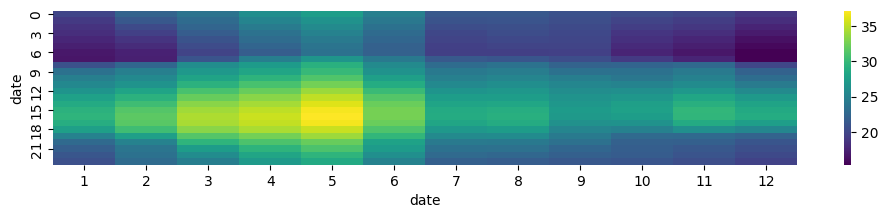

In [6]:

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 2))
sns.heatmap(tdb_heatmap,  cmap="viridis")

In [9]:
tmx["mes"] = tmx.index.month_name()
tmx

variable,dhi,dni,ghi,p_atm,rain_acc,rh,solar_altitude,tdb,uv,wd,ws,mes
date,,,,,,,,,,,,
2023-10-27 16:40:00,NaN,443.2,238.0,873.2120,17.1,61.14,18.644204,28.07,0.018,226.50,1.569,October
2023-10-27 16:50:00,NaN,NaN,187.5,873.2559,6.3,62.76,16.430841,27.78,0.014,171.60,1.631,October
2023-10-27 17:00:00,1360.00,NaN,167.5,873.2161,27.8,64.26,14.204506,28.00,0.011,314.70,0.479,October
2023-10-27 17:10:00,74.14,520.5,163.1,873.1834,5.4,66.82,11.967374,28.69,0.009,163.60,0.504,October
2023-10-27 17:20:00,67.62,269.2,126.1,873.2775,1.5,60.92,9.722172,28.77,0.006,260.30,0.964,October
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29 23:20:00,NaN,NaN,NaN,861.8378,0.0,43.17,-52.087453,26.46,0.000,164.30,0.808,April
2025-04-29 23:30:00,NaN,NaN,NaN,861.8724,0.0,46.12,-53.192891,26.30,0.000,337.00,0.518,April
2025-04-29 23:40:00,NaN,NaN,NaN,861.8623,0.0,46.82,-54.162933,25.57,0.000,70.61,1.358,April


<Axes: xlabel='mes', ylabel='tdb'>

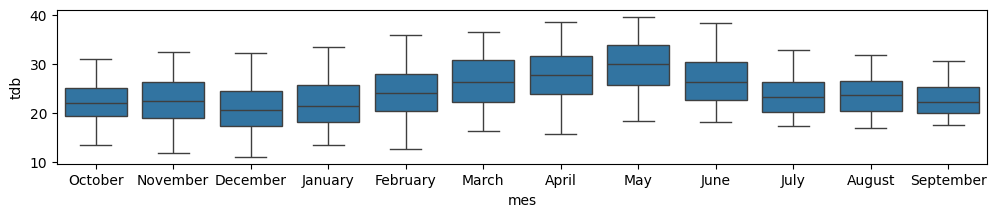

In [11]:
f, ax = plt.subplots(figsize=(12, 2))
sns.boxplot(x="mes", y="tdb",data=tmx)
